In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap




In [61]:
# Initialize Fibonacci sequence
fibonacci_first_number = 0
fibonacci_second_number = 1

# Simulate Fibonacci sequence until a given number
fibonacci_limit = 233  # Total spirals (89 + 144)

while fibonacci_first_number + fibonacci_second_number <= fibonacci_limit:
    # Calculate the next Fibonacci number
    fibonacci_new_number = fibonacci_first_number + fibonacci_second_number
    
    # Update the sequence
    fibonacci_first_number = fibonacci_second_number
    fibonacci_second_number = fibonacci_new_number
    
    # Print the current Fibonacci number
    print(f"The new Fibonacci number is {fibonacci_new_number}")


The new Fibonacci number is 1
The new Fibonacci number is 2
The new Fibonacci number is 3
The new Fibonacci number is 5
The new Fibonacci number is 8
The new Fibonacci number is 13
The new Fibonacci number is 21
The new Fibonacci number is 34
The new Fibonacci number is 55
The new Fibonacci number is 89
The new Fibonacci number is 144
The new Fibonacci number is 233


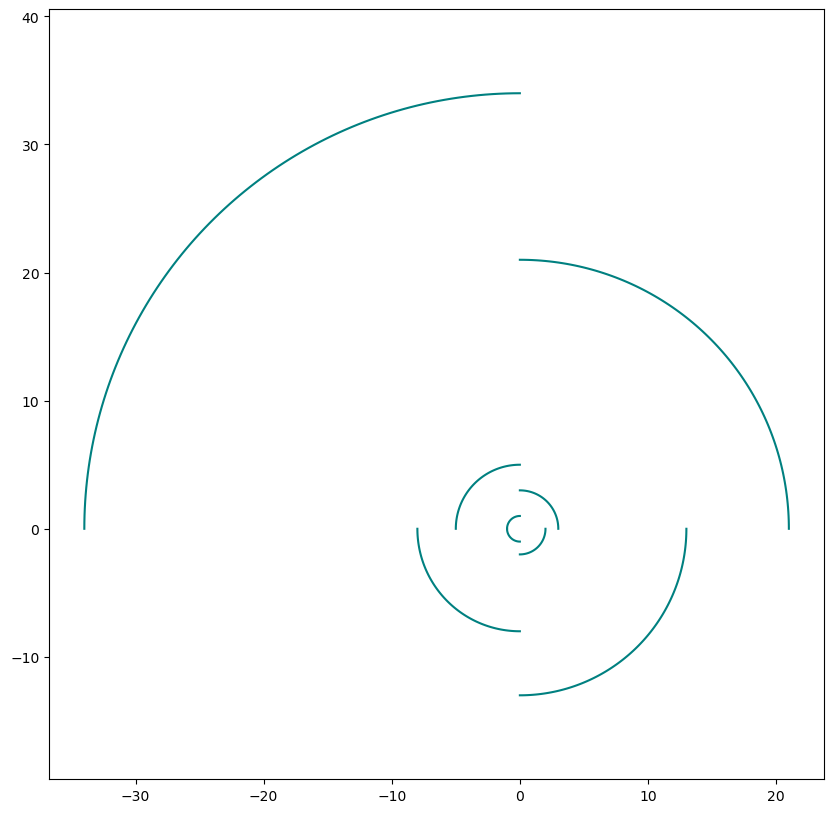

In [62]:


# Generate Fibonacci numbers
def fibonacci(n):
    fib = [0, 1]
    for i in range(2, n):
        fib.append(fib[-1] + fib[-2])
    return fib

# Plot Fibonacci spiral
def fibonacci_spiral(n):
    fib = fibonacci(n)
    plt.figure(figsize=(10, 10))
    angle = 0
    for radius in fib:
        theta = np.linspace(angle, angle + np.pi/2, 100)
        x = radius * np.cos(theta)
        y = radius * np.sin(theta)
        plt.plot(x, y, color='teal')
        angle += np.pi / 2
    plt.axis('equal')
    plt.show()

# Run the function
fibonacci_spiral(10)

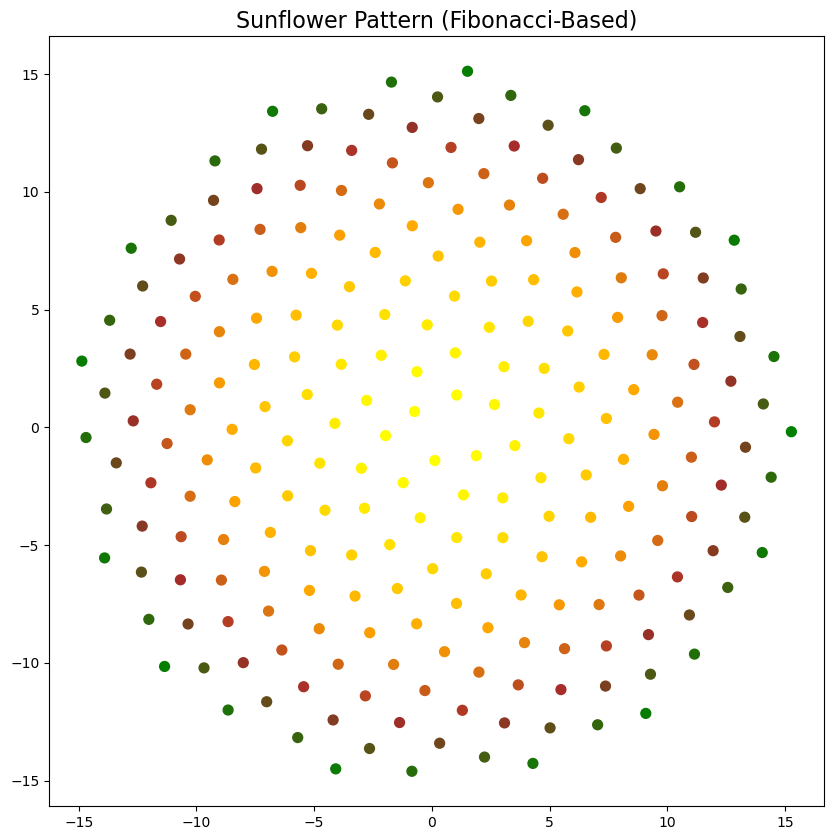

In [63]:

# Generate Fibonacci spiral points
def sunflower_spiral(n): #n represents number of points to generate in spiral
    golden_angle = np.pi * (3 - np.sqrt(5))  #Golden angle in radians - approx. 137.5 degrees.
    #Determines spacing of points in spiral
    radii = np.sqrt(np.arange(1, n + 1))  #Use square root via array of radii for gradual spacing
    # of points from centre, creating spiral effect
    angles = np.arange(1, n + 1) * golden_angle #Generates an array of angles by multiplying golden
    # angle by integers from 1 to 'n'. Each point in spiral will be placed at angles
    x = radii * np.cos(angles) #Cartesian coordinates (x and y coordinates of spiral: cosine and sine)
    y = radii * np.sin(angles)
    return x, y #Returns coordinates as two separate arrays

sunflower_colors = LinearSegmentedColormap.from_list( #Creates custom colour map using from_list method
    "sunflower", ["yellow", "orange", "brown", "green"] # this conveys transition of colour points in sunflower
)

# Plot the sunflower spiral
def plot_sunflower(n): #n represents number of points in sunflower spiral
    #(233,which approximates the usual number of seeds in a large sunflower)
    x, y = sunflower_spiral(n) #Generates x and y coordinates of the points in spiral
    plt.figure(figsize=(10, 10)) #Initialises new figure for plotting with specified size: 10 inches * 10 inches
    plt.scatter(x, y, 
                c=np.arange(n), #Assigns colour to each point based on its index 
                cmap=sunflower_colors, #Uses previously defined colourmap for colouring the points
                s=50 #Sets size of each point in scatter plot
               ) 
    plt.axis('equal') #Scaling of the x and y axis is equal, thus 
                      #ensuring that the spiral appears correctly proportioned
    plt.title("Sunflower Pattern (Fibonacci-Based)", fontsize=16)
    plt.show()

# Run the function
plot_sunflower(233) #generates the plot with 'n' set to 233
